# Read Data

Author : Prasad Patharvat

In [1]:
#Importing Important Libraries

from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd   #For Dataframe Operations
import numpy as np    #For Mathematical Computation
import matplotlib.pyplot as plt   #For plotting Data

In [2]:
#Import Data-set

Df_train = pd.read_csv("C:Desktop/Data Sets/Google_Stock_Price_Train.csv")

In [3]:
Df_train.head()    #Check Data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Missing Data Treatment

In [4]:
Df_train.isnull().sum()

#there is no missing data present in our dataset
#now,we can use dateset

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
#Get Stock Opening Price

train_new = Df_train[["Open"]].values

In [6]:
#train_new

# Preprocessing of Data

In [7]:
from sklearn.preprocessing import MinMaxScaler
nm = MinMaxScaler()
train_new_scaled = nm.fit_transform(train_new)

#Here, we use MinMaxScaler to scale our data between 0 and 1

In [8]:
train_new_scaled.shape

(1258, 1)

# Split Data in train and test set

Initialized data into xtrain and ytrain
We want to predict 61st value of Google_stock_price.

The first entry in the xtrain would be an array of 
irst 60 open stock price and first entry in ytrain would 
be 61st value of open stock price.

In [9]:
xtrain = []
ytrain =[]
for i in range(60,1258,1):
    xtrain.append(train_new_scaled[i-60:i])
    ytrain.append(train_new_scaled[i:i+1,0])

In [10]:
type(xtrain)

list

In [11]:
x_tr = np.array(xtrain)
y_tr = np.array(ytrain)

# xtrain and ytrain in the from of list using numpy library we convert it into array

In [12]:
x_tr.shape

(1198, 60, 1)

In [13]:
y_tr.shape

(1198, 1)

# Creating the model

In [15]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [17]:
nn = Sequential()
nn.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50, return_sequences = True))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50, return_sequences = True))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50))
nn.add(Dropout(0.2))

nn.add(Dense(units = 1))

In [18]:
nn.compile(optimizer= 'adam' ,loss = 'mean_squared_error')
nn.fit(x_tr,y_tr,epochs=100)

Epoch 1/100
38/38 [==============================] - 46s 539ms/step - loss: 0.0592
Epoch 2/100
38/38 [==============================] - 18s 484ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 17s 447ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 17s 448ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 17s 456ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 17s 451ms/step - loss: 0.0043
Epoch 7/100
38/38 [==============================] - 17s 448ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 16s 432ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 17s 448ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 16s 433ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 17s 437ms/step - loss: 0.0037
Epoch 12/100
38/38 [==============================] - 24s 642ms/step - loss: 0.0038
E

In [19]:
Q = nn.predict(x_tr)

In [20]:
Q

array([[0.09886762],
       [0.10087161],
       [0.10220219],
       ...,
       [0.927706  ],
       [0.92930764],
       [0.9269786 ]], dtype=float32)

In [56]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_tr,Q)

0.018296646374422347

In [57]:
W = pd.DataFrame(nm.inverse_transform(y_tr))

In [58]:
W["1"] = pd.DataFrame(nm.inverse_transform(Q))

In [59]:
W

,0,1
0,325.50,332.267273
1,324.66,333.344543
2,319.19,334.059814
3,321.50,333.824371
4,318.03,332.883301
...,...,...
1193,790.90,778.252686
1194,790.68,777.981628
1195,793.70,777.817627
1196,783.33,778.678650


# Read Test Data Set

In [142]:
A = pd.read_csv("C:Desktop/Data Sets/Google_Stock_Price_Test.csv")
A.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [143]:
#Check Missing values in test Data

A.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [144]:
stock_price = A

In [145]:
stock_price.shape

(20, 6)

In [146]:
ts_df = pd.concat([Df_train,stock_price])
ts_df.index = range(1278)

In [147]:
ts_df.shape

(1278, 6)

In [148]:
ts_df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1273,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
1274,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
1275,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
1276,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"


In [149]:
ts_df = ts_df[['Open']].values

In [150]:
ts_df

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [834.71],
       [814.66],
       [796.86]])

In [151]:
#Use MinMaxScaler to scale our test data between 0 and 1

ts_df_scaled = nm.fit_transform(ts_df)

In [152]:
ts_df_scaled.shape

(1278, 1)

In [153]:
#Initialized data into xtest

xtest = []
for i in range(1258,1278,1):
    xtest.append(ts_df_scaled[i-60:i])

In [154]:
xtest

[array([[0.8947359 ],
        [0.89591723],
        [0.89242693],
        [0.90844654],
        [0.90325583],
        [0.89870948],
        [0.89947914],
        [0.89616782],
        [0.91057653],
        [0.9291736 ],
        [0.9382305 ],
        [0.92337432],
        [0.94109435],
        [0.96217938],
        [0.9436718 ],
        [0.93411373],
        [0.94726951],
        [0.92421558],
        [0.90169862],
        [0.89330398],
        [0.87370456],
        [0.8440101 ],
        [0.88668134],
        [0.90261147],
        [0.89641841],
        [0.916519  ],
        [0.85453472],
        [0.85285221],
        [0.83740536],
        [0.85213625],
        [0.87311389],
        [0.88107895],
        [0.86539942],
        [0.88333423],
        [0.87456371],
        [0.86835275],
        [0.86072777],
        [0.88136534],
        [0.87875208],
        [0.85614563],
        [0.83314539],
        [0.8566289 ],
        [0.86919401],
        [0.86251768],
        [0.88306574],
        [0

In [155]:
x_ts = np.array(xtest)

#xtest in the from of list using numpy library we convert into array


In [156]:
x_ts

array([[[0.8947359 ],
        [0.89591723],
        [0.89242693],
        ...,
        [0.92104745],
        [0.90248617],
        [0.90144803]],

       [[0.89591723],
        [0.89242693],
        [0.90844654],
        ...,
        [0.90248617],
        [0.90144803],
        [0.89439582]],

       [[0.89242693],
        [0.90844654],
        [0.90325583],
        ...,
        [0.90144803],
        [0.89439582],
        [0.91148938]],

       ...,

       [[0.92421558],
        [0.90169862],
        [0.89330398],
        ...,
        [0.97223863],
        [0.98534071],
        [1.        ]],

       [[0.90169862],
        [0.89330398],
        [0.87370456],
        ...,
        [0.98534071],
        [1.        ],
        [0.99445131]],

       [[0.89330398],
        [0.87370456],
        [0.8440101 ],
        ...,
        [1.        ],
        [0.99445131],
        [0.95856378]]])

In [157]:
test_prediction = nn.predict(x_ts)

In [158]:
# Make Predication Using Model

Z =pd.DataFrame(nm.inverse_transform(test_prediction))

In [169]:
Z.head()

,0
0,776.422302
1,773.566345
2,773.523987
3,774.732422
4,778.049255


In [172]:
stock_price['Test_Pred'] = Z

In [161]:
stock_price

,Date,Open,High,Low,Close,Volume,Test_Pred
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300",776.422302
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000",773.566345
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200",773.523987
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200",774.732422
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400",778.049255
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800",784.065491
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900",789.790100
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100",792.360474
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200",792.786499
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100",792.278687


# Visualizing the results

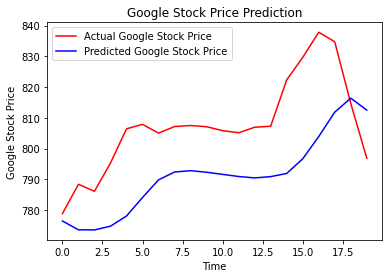

In [189]:
import matplotlib.pyplot as plt
plt.plot(stock_price['Open'],color = 'red', label = 'Actual Google Stock Price')
plt.plot(stock_price['Test_Pred'],color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')

plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
